In [1]:
from TwinNeuralNetwork import TNNR

In [2]:
f = lambda x: x**3 - 0.3*x

2023-06-08 14:16:06.108035: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


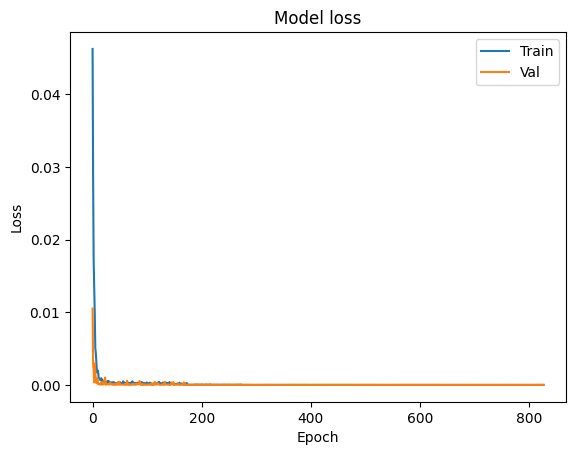

CPU times: user 35.1 s, sys: 5.33 s, total: 40.5 s
Wall time: 27.1 s


In [3]:
%%time

tnnr = TNNR(f, n=100, show_summary=False, show_loss_plot=True, show_rmse=False)

In [4]:
tnnr.rmse_test

0.00036043847573277954

In [2]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'f(x)')

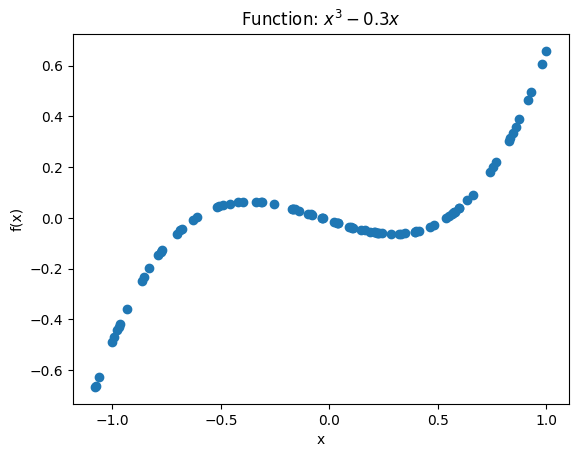

In [6]:
function_text = '$x^3 - 0.3x$'

plt.scatter(tnnr.x_train_single, tnnr.y_train_single)
plt.title('Function: ' + function_text)
plt.xlabel('x')
plt.ylabel('f(x)')

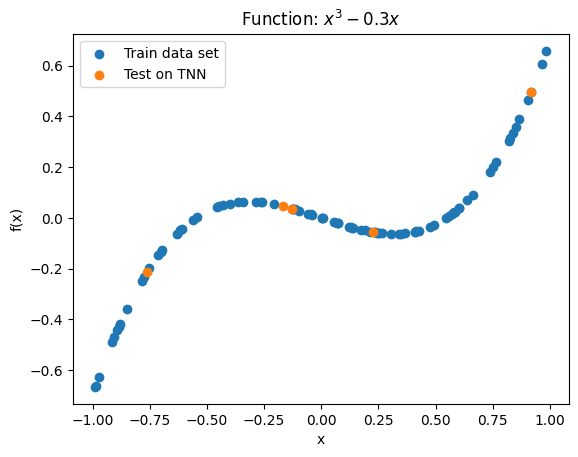

In [7]:
plt.scatter(tnnr.cn_transformer.inverse_transform_x(tnnr.x_train_single), 
            tnnr.cn_transformer.inverse_transform_y(tnnr.y_train_single),
            label='Train data set')
plt.scatter(tnnr.cn_transformer.inverse_transform_x(tnnr.x_test_single), 
            tnnr.y_pred_test,
            label='Test on TNN')
plt.title('Function: ' + function_text)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

In [3]:
from TwinNeuralNetwork import ANNR

create_model - inside annr
generator_sym - inside annr
generator_sym - inside annr


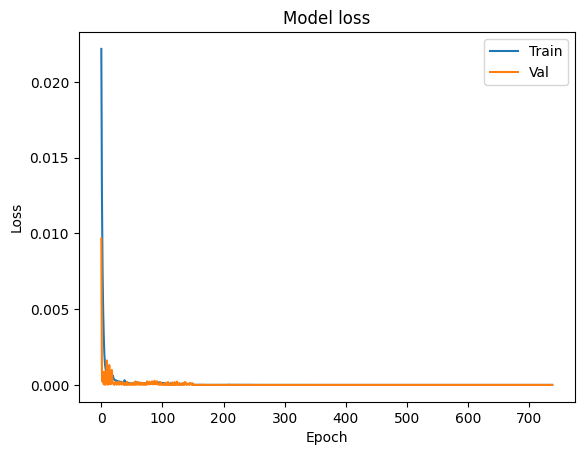

test_model - inside annr
CPU times: user 28.7 s, sys: 4.31 s, total: 33 s
Wall time: 22.3 s


In [9]:
%%time

annr = ANNR(f, n=100, show_summary=False, show_loss_plot=True, show_rmse=False)

In [10]:
annr.rmse_test

0.0007681081802952199

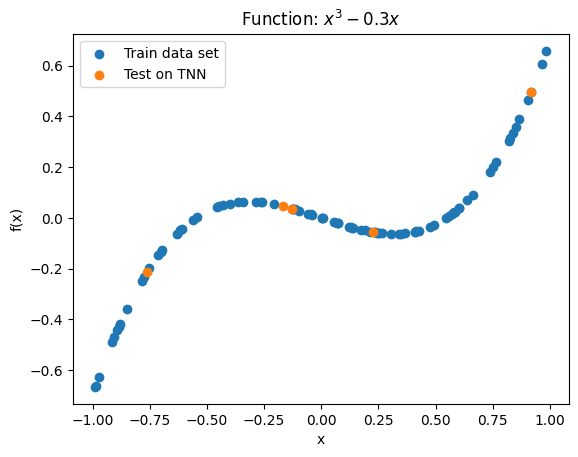

In [11]:
plt.scatter(annr.cn_transformer.inverse_transform_x(annr.x_train_single), 
            annr.cn_transformer.inverse_transform_y(annr.y_train_single),
            label='Train data set')
plt.scatter(annr.cn_transformer.inverse_transform_x(annr.x_test_single), 
            annr.y_pred_test,
            label='Test on TNN')
plt.title('Function: ' + function_text)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

In [4]:
import numpy as np

In [15]:
np.array_equal(tnnr.x_train_single, annr.x_train_single)

True

In [18]:
np.array_equal(tnnr.y_train_single, annr.y_train_single)

True

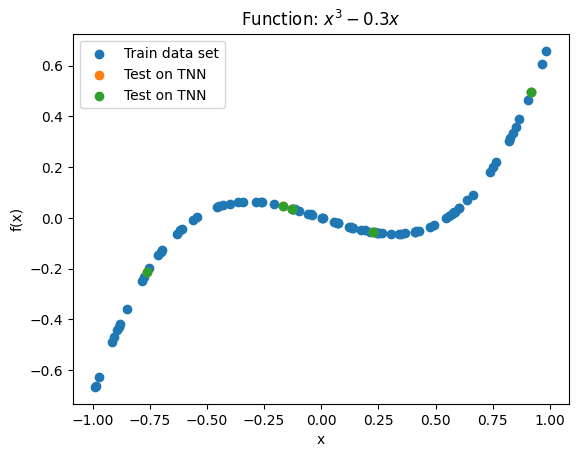

In [16]:
plt.scatter(annr.cn_transformer.inverse_transform_x(annr.x_train_single), 
            annr.cn_transformer.inverse_transform_y(annr.y_train_single),
            label='Train data set')
plt.scatter(tnnr.cn_transformer.inverse_transform_x(tnnr.x_test_single), 
            tnnr.y_pred_test,
            label='Test on TNN')
plt.scatter(annr.cn_transformer.inverse_transform_x(annr.x_test_single), 
            annr.y_pred_test,
            label='Test on TNN')
plt.title('Function: ' + function_text)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

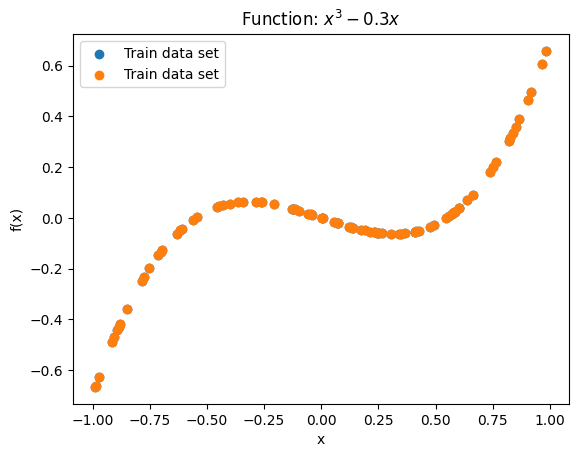

In [19]:
plt.scatter(tnnr.cn_transformer.inverse_transform_x(tnnr.x_train_single), 
            tnnr.cn_transformer.inverse_transform_y(tnnr.y_train_single),
            label='Train data set')
plt.scatter(annr.cn_transformer.inverse_transform_x(annr.x_train_single), 
            annr.cn_transformer.inverse_transform_y(annr.y_train_single),
            label='Train data set')

plt.title('Function: ' + function_text)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

In [5]:
def create_func(a):
    return lambda x: x**3 - a*x

In [6]:
f1 = create_func(0.3)

In [7]:
f1(2)

7.4

In [8]:
def_func = lambda a: lambda x: x**3 - a*x

In [9]:
f2 = def_func(0.3)

In [10]:
f2(2)

7.4

In [ ]:
%%time

seed = 234
rmses = []

for a in np.arange(-10, 10.1, 0.1):
    tnnr = TNNR(def_func(a), n=1000, seed=seed, show_summary=False, show_loss_plot=False, show_rmse=False)
    annr = ANNR(def_func(a), n=1000, seed=seed, show_summary=False, show_loss_plot=False, show_rmse=False)
    rmses.append([tnnr.rmse_test, annr.rmse_test])
    seed += 78

In [35]:
rmses

[[0.0005187798981959456, 0.000481920096903144],
 [0.00043543938303537477, 0.0006593905820470692],
 [0.00043357320715654645, 0.00036798055295198017],
 [0.0003380344740798124, 0.0004318784349431613],
 [0.0004910462598023289, 0.0005701140815364613],
 [0.0003364463132732538, 0.00038984760756629493],
 [0.0003623158632694668, 0.0003676137202197346],
 [0.0002724522031084602, 0.0002981691635147956],
 [0.00029315211159356547, 0.000363781301586057],
 [0.0003413794235393829, 0.00017957023978441947],
 [0.0004554921133901637, 0.0004003296350020687],
 [0.0003742237303799484, 0.00033795165519899886],
 [0.00044454948681811347, 0.0007915385200475778],
 [0.0004498670671812565, 0.00043727682146392955],
 [0.00030999290624105473, 0.00019003304719630948],
 [0.00028324138608023033, 0.00019715024126795166],
 [0.00048653942960163484, 0.0004913703330341992],
 [0.0004299091008977791, 0.00013475567873780014],
 [0.0004045216343160622, 0.0002776892311548319],
 [0.0005800151121374167, 0.000379898177024567],
 [0.0003

In [51]:
np.array(rmses)[:,0]

array([0.00051878, 0.00043544, 0.00043357, 0.00033803, 0.00049105,
       0.00033645, 0.00036232, 0.00027245, 0.00029315, 0.00034138,
       0.00045549, 0.00037422, 0.00044455, 0.00044987, 0.00030999,
       0.00028324, 0.00048654, 0.00042991, 0.00040452, 0.00058002,
       0.000391  ])

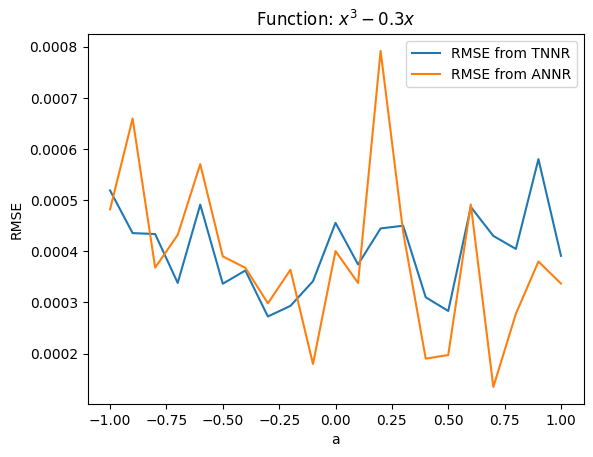

In [52]:
plt.plot(np.arange(-1, 1.1, 0.1), 
            np.array(rmses)[:,0],
            label='RMSE from TNNR')
plt.plot(np.arange(-1, 1.1, 0.1), 
            np.array(rmses)[:,1],
            label='RMSE from ANNR')

plt.title('Function: ' + function_text)
plt.xlabel('a')
plt.ylabel('RMSE')
plt.legend()

In [18]:
np.arange(-100, 101, 10)

array([-100,  -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,
         10,   20,   30,   40,   50,   60,   70,   80,   90,  100])

In [11]:
%%time

seed = 236
rmses = []

for a in np.arange(-100, 101, 10):
    tnnr = TNNR(def_func(a), n=1000, seed=seed, show_summary=False, show_loss_plot=False, show_rmse=False)
    annr = ANNR(def_func(a), n=1000, seed=seed, show_summary=False, show_loss_plot=False, show_rmse=False)
    rmses.append([tnnr.rmse_test, annr.rmse_test])
    seed += 78

2023-06-08 18:31:31.413374: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


CPU times: user 2h 43min 11s, sys: 25min 26s, total: 3h 8min 38s
Wall time: 2h 2min 56s


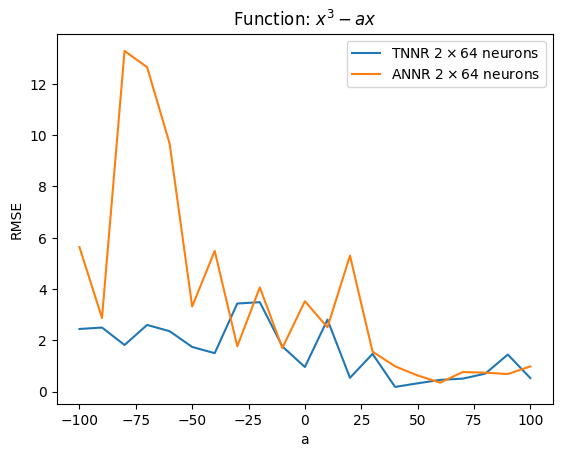

In [20]:
plt.plot(np.arange(-100, 101, 10), np.array(rmses)[:,0], label='TNNR $2\\times 64$ neurons')
plt.plot(np.arange(-100, 101, 10), np.array(rmses)[:,1], label='ANNR $2\\times 64$ neurons')

plt.title('Function: $x^3 - ax$')
plt.xlabel('a')
plt.ylabel('RMSE')
plt.legend()

In [18]:
%%time

seed = 236
rmses_128 = []

for a in np.arange(-100, 101, 10):
    tnnr_128 = TNNR(def_func(a), n=1000, seed=seed, neurons=128,
                    show_summary=False, show_loss_plot=False, show_rmse=False)
    annr_128 = ANNR(def_func(a), n=1000, seed=seed, neurons=128
                    , show_summary=False, show_loss_plot=False, show_rmse=False)
    rmses_128.append([tnnr_128.rmse_test, annr_128.rmse_test])
    seed += 78

CPU times: user 3h 21min 43s, sys: 1h 4min 5s, total: 4h 25min 48s
Wall time: 2h 19min 39s


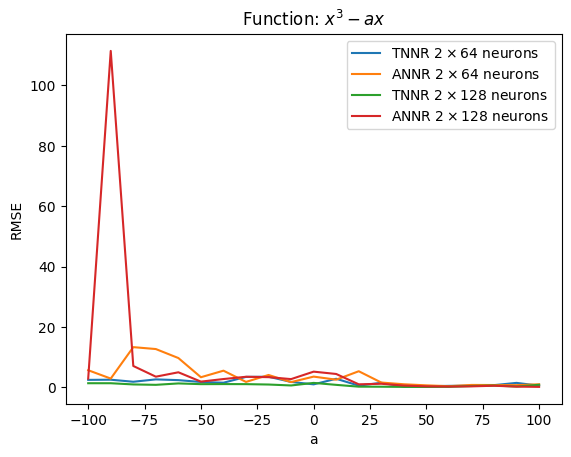

In [23]:
plt.plot(np.arange(-100, 101, 10), np.array(rmses)[:,0], label='TNNR $2\\times 64$ neurons')
plt.plot(np.arange(-100, 101, 10), np.array(rmses)[:,1], label='ANNR $2\\times 64$ neurons')
plt.plot(np.arange(-100, 101, 10), np.array(rmses_128)[:,0], label='TNNR $2\\times 128$ neurons')
plt.plot(np.arange(-100, 101, 10), np.array(rmses_128)[:,1], label='ANNR $2\\times 128$ neurons')

plt.title('Function: $x^3 - ax$')
plt.xlabel('a')
plt.ylabel('RMSE')
plt.legend()

(-0.5, 20.0)

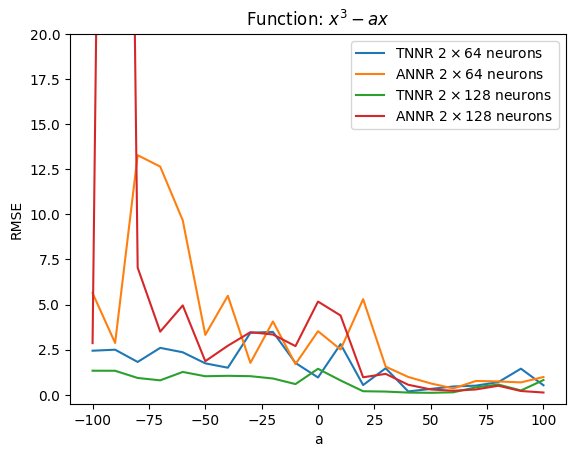

In [25]:
plt.plot(np.arange(-100, 101, 10), np.array(rmses)[:,0], label='TNNR $2\\times 64$ neurons')
plt.plot(np.arange(-100, 101, 10), np.array(rmses)[:,1], label='ANNR $2\\times 64$ neurons')
plt.plot(np.arange(-100, 101, 10), np.array(rmses_128)[:,0], label='TNNR $2\\times 128$ neurons')
plt.plot(np.arange(-100, 101, 10), np.array(rmses_128)[:,1], label='ANNR $2\\times 128$ neurons')

plt.title('Function: $x^3 - ax$')
plt.xlabel('a')
plt.ylabel('RMSE')
plt.legend()

plt.ylim([-0.5, 20])

In [26]:
%%time

seed = 253
rmses = []

for a in np.arange(-100, 101, 10):
    tnnr_64 = TNNR(def_func(a), n=1000, seed=seed, show_summary=False, show_loss_plot=False, show_rmse=False)
    annr_64 = ANNR(def_func(a), n=1000, seed=seed, show_summary=False, show_loss_plot=False, show_rmse=False)
    tnnr_128 = TNNR(def_func(a), n=1000, seed=seed, neurons=128,
                    show_summary=False, show_loss_plot=False, show_rmse=False)
    annr_128 = ANNR(def_func(a), n=1000, seed=seed, neurons=128
                    , show_summary=False, show_loss_plot=False, show_rmse=False)
    rmses.append([tnnr_64.rmse_test, annr_64.rmse_test, tnnr_128.rmse_test, annr_128.rmse_test])
    seed += 75

CPU times: user 6h 44min 53s, sys: 1h 39min 34s, total: 8h 24min 27s
Wall time: 4h 49min 54s


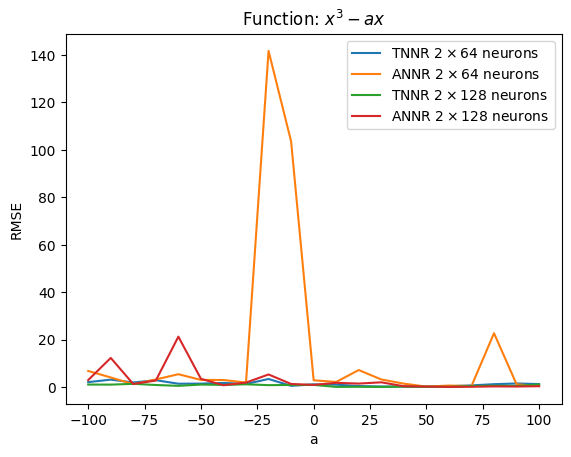

In [27]:
plt.plot(np.arange(-100, 101, 10), np.array(rmses)[:,0], label='TNNR $2\\times 64$ neurons')
plt.plot(np.arange(-100, 101, 10), np.array(rmses)[:,1], label='ANNR $2\\times 64$ neurons')
plt.plot(np.arange(-100, 101, 10), np.array(rmses)[:,2], label='TNNR $2\\times 128$ neurons')
plt.plot(np.arange(-100, 101, 10), np.array(rmses)[:,3], label='ANNR $2\\times 128$ neurons')

plt.title('Function: $x^3 - ax$')
plt.xlabel('a')
plt.ylabel('RMSE')
plt.legend()

(-0.5, 20.0)

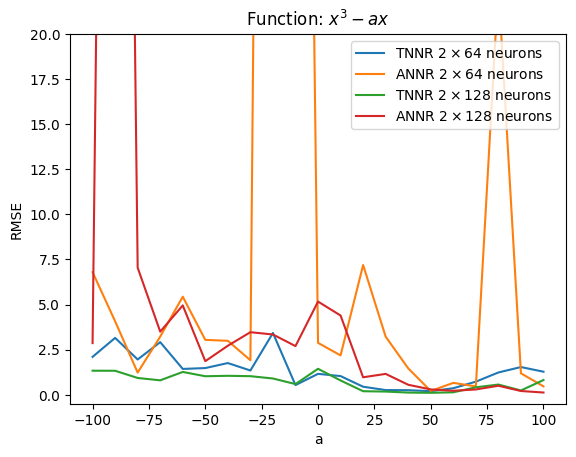

In [29]:
plt.plot(np.arange(-100, 101, 10), np.array(rmses)[:,0], label='TNNR $2\\times 64$ neurons')
plt.plot(np.arange(-100, 101, 10), np.array(rmses)[:,1], label='ANNR $2\\times 64$ neurons')
plt.plot(np.arange(-100, 101, 10), np.array(rmses_128)[:,0], label='TNNR $2\\times 128$ neurons')
plt.plot(np.arange(-100, 101, 10), np.array(rmses_128)[:,1], label='ANNR $2\\times 128$ neurons')

plt.title('Function: $x^3 - ax$')
plt.xlabel('a')
plt.ylabel('RMSE')
plt.legend()

plt.ylim([-0.5, 20])